In [1]:
# Imports
from pgmpy.factors.discrete import TabularCPD
import numpy as np
from pgmpy.models import BayesianModel


In [2]:
# Defining the Network
edges_list = [
    [('x1','x2'),
    ('x1','x4'),
    ('x1','x6')],
    [('x2','x3'),
    ('x2','x5')],
    [('x3','x2'),
    ('x3','x5'),
    ('x3','x6')]
]

nodes_list = [
    {
        'x1':{
            'States': {
                '0':{},
                '1':{},
                '2':{},
                '3':{}
            }
        },
        'x2':{
        'States':{
            '0':{},
            '1':{},
            '2':{},
            '3':{},
            '4':{}
        }
        },
        'x4':{
        'States':{
            '0':{},
            '1':{},
            '2':{},
            '3':{}
        }
        },
        'x6':{
        'States':{
            '0':{},
            '1':{},
            '2':{},
            '3':{},
            '4':{}
        }
        }
    },
    {
        'x2':{
        'States':{
            '0':{},
            '1':{},
            '2':{},
            '3':{},
            '4':{}
        }
        },
        'x3':{
        'States':{
            '0':{},
            '1':{},
            '2':{}
        }
        },
        'x5':{
        'States':{
            '0':{},
            '1':{},
            '2':{},
            '3':{}
        }
        }
    },
    {
        'x2':{
        'States':{
            '0':{},
            '1':{},
            '2':{},
            '3':{},
            '4':{}
        }
        },
        'x3':{
        'States':{
            '0':{},
            '1':{},
            '2':{}
        }
        },
        'x5':{
        'States':{
            '0':{},
            '1':{},
            '2':{},
            '3':{}
        }
        },
        'x6':{
        'States':{
            '0':{},
            '1':{},
            '2':{},
            '3':{},
            '4':{}
        }
        }
    }
]

cpds_list = [
    [
        {
        #Given x2 given x1
        'Values': np.array([[23.1,66.6,45.5,40],
                           [36.5,0,9.1,20],
                           [2.6,0,0,3.3],
                           [17.3,0,18.2,16.7],
                           [20.5,33.3,27.3,20]]),
        'Variables':{'x2':['x1']}
        },
        {
        'Values': np.array([[73.7,100,72.7,56.7],
                           [7.7,0,27.3,20],
                           [1.3,0,0,0],
                           [17.3,0,0,23.3]]),
        'Variables':{'x4':['x1']}
        },
        {
        'Values': np.array([[1.9,0,0,0],
                            [28.2,66.6,54.5,40],
                            [12.8,33.3,9.1,20],
                            [35.2,0,18.2,20],
                            [21.8,0,18.2,20]]),
        'Variables':{'x6':['x1']}
        }
    ],
    [
        # Given x2
        {
        'Values':np.array([[12.7,26.6,20,17.6,11.9],
                           [74.5,65.6,80,70.6,50],
                           [12.7,7.8,0,11.8,38.1]]),
        'Variables':{'x3':['x2']}
        },
        {
        'Values':np.array([[41.8,33.4,60,38.2,33.4],
                           [7.3,10.9,40,14.7,9.5],
                           [10.9,12.5,0,11.8,7.1],
                           [40,42.2,0,35.3,50]]),
        'Variables':{'x5':['x2']}
        }
    ],
    [
        # Given x3
        {
        'Values':np.array([[19.4,31.1,21.9],
                          [47.2,31.8,15.6],
                          [2.8,3.03,0],
                          [16.7,18.2,12.5],
                          [13.9,15.9,50]]),
        'Variables':{'x2':['x3']}
        },
        {
        'Values':np.array([[36.1,39.4,31.3],
                          [8.3,11.4,12.5],
                          [22.2,9.1,3.1],
                          [33.3,40.2,53.1]]),
        'Variables':{'x5':['x3']}
        },
        {
        'Values':np.array([[0,2.3,0],
                          [38.9,31.8,25],
                          [8.3,15.2,15.6],
                          [36.1,30.3,20.3],
                          [16.7,20.4,28.1]]),
        'Variables':{'x6':['x3']}
        }
    ]
]

for item in cpds_list:
    for cpd in item:
        cpd['Values'] = cpd['Values']/100
    
# Marginal Dist
marginal_list = {
    "x1":np.array([0.78,0.015,0.055,0.15]),
    "x2":np.array([0.275,0.32,0.025,0.17,0.21]),
    "x3":np.array([0.18,0.66,0.16]),
    "x4":np.array([0.715,0.105,0.01,0.17]),
    "x5":np.array([0.375,0.11,0.105,0.41]),
    "x6":np.array([0.015,0.32,0.14,0.315,0.21])
}

In [3]:
table = 1
_edges = edges_list[table]
_nodes = nodes_list[table]
_cpds = cpds_list[table]
model = BayesianModel(_edges)

for node in _nodes:
    #model.node[node] = nodes[node]
    model.node[node].update(_nodes[node])

tabular_cpds = []
for cpd in _cpds:
    var = list(cpd['Variables'].keys())[0]
    evidence = cpd['Variables'][var]
    values = cpd['Values']
    states = len(_nodes[var]['States'])
    evidence_card = [len(_nodes[evidence_var]['States'])
                     for evidence_var in evidence]
    tabular_cpds.append(
        TabularCPD(var, states, values, evidence, evidence_card))

model.add_cpds(*tabular_cpds)


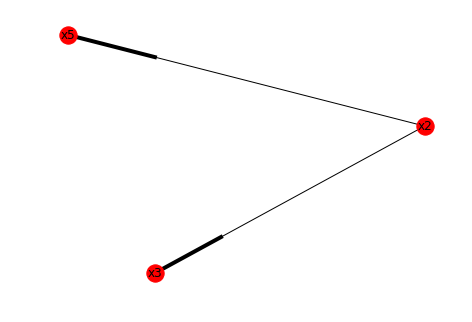

In [5]:
# Requires matplotlib < 2.2
import networkx as nx
import matplotlib.pyplot as plt
nx.draw(model, with_labels=True)

In [6]:
for cpd in model.cpds:
    print(cpd)

+------+-------+--------------------+------+---------------------+---------------------+
| x2   | x2_0  | x2_1               | x2_2 | x2_3                | x2_4                |
+------+-------+--------------------+------+---------------------+---------------------+
| x3_0 | 0.127 | 0.266              | 0.2  | 0.17600000000000002 | 0.11900000000000001 |
+------+-------+--------------------+------+---------------------+---------------------+
| x3_1 | 0.745 | 0.6559999999999999 | 0.8  | 0.706               | 0.5                 |
+------+-------+--------------------+------+---------------------+---------------------+
| x3_2 | 0.127 | 0.078              | 0.0  | 0.11800000000000001 | 0.381               |
+------+-------+--------------------+------+---------------------+---------------------+
+------+-------+---------------------+------+---------------------+---------------------+
| x2   | x2_0  | x2_1                | x2_2 | x2_3                | x2_4                |
+------+-------+---

In [7]:
# Local Independencies Don't know correct or not
#model.local_independencies('x2')

In [8]:
# Independencies based on D-seperation properties
#model.get_independencies()

In [9]:
# Joint between two variables
# If independence test returns false then two variables are not independent
def independence_test(condVar,varY,stateX,stateY,cpd_val,marginal_list):
    stateY = int(stateY)
    stateX = int(stateX)
    prob_Y_given_X = cpd_val[stateY][stateX]
    marginal_X = marginal_list[condVar][stateX]
    lhs = np.multiply(prob_Y_given_X,marginal_X)
    marginal_Y = marginal_list[varY][stateY]
    rhs = np.multiply(marginal_Y,marginal_X)
    return np.abs((lhs-rhs))


In [10]:
numTables = 3
for table in range(numTables):
    _edges = edges_list[table]
    _nodes = nodes_list[table]
    _cpds = cpds_list[table]
    for cpd in _cpds:
        varY = list(cpd["Variables"].keys())[0]
        condVar = list(cpd["Variables"].values())[0][0]
        cpd_val = cpd['Values']
        print(varY,",",condVar)
        lOne = []
        for stateY in _nodes[varY]['States'].keys():
            for stateX in _nodes[condVar]['States'].keys():
                lOne.append(independence_test(condVar,varY,stateX,stateY,cpd_val,marginal_list))
        print(np.sum(lOne))

x2 , x1
0.15977000000000002
x4 , x1
0.11943000000000005
x6 , x1
0.16015500000000005
x3 , x2
0.21852500000000008
x5 , x2
0.13246000000000005
x2 , x3
0.21875800000000004
x5 , x3
0.11551999999999997
x6 , x3
0.11324000000000001


In [11]:
'''
Model 1 uses Naive method for thresholding, Based on cutoff of 0.11 and avoiding loops
Model 2 could be a cyclic edge between x3 and x2
'''

'\nModel 1 uses Naive method for thresholding, Based on cutoff of 0.11 and avoiding loops\nModel 2 could be a cyclic edge between x3 and x2\n'

In [12]:
def accio_cpd_table(_cond_var):
    '''
    Lookup the CPD table for a given Variable
    Returns the table in which the dist is encoded in
    '''
    switch_cpd_dict_given = {'x1':0,'x2':1,'x3':2}
    table = switch_cpd_dict_given[_cond_var]
    return table

def accio_state_table(_var,nodes_list):
    switch_node_dict = {'x1':0,'x2':0,'x3':1,'x4':0,'x5':1,'x6':2}
    states_possible = switch_node_dict[_var]
    states_possible = len(list(nodes_list[switch_node_dict[_var]][_var].values())[0].keys())
    return states_possible

In [13]:
def find_given(_varA,_cond_var,_cond_var_state,_varA_state,cpds_list,marginal_list,ind_dict):
    '''
    Finds if a variable is dependent or not on the assumption in the paper that any variables
    not present in the cpd tables are independent
    '''
    # Find given values
    _cpds = cpds_list[accio_cpd_table(_cond_var)]
    if(ind_dict[_varA] == 'I'):
        #print("Marg")
        # Discarding Cond Var and marg lookup
        return marginal_list[_varA][_varA_state]
    else:
        #print("Cond Lookup")
        for _cpd in _cpds:
            if _varA in _cpd["Variables"]:
                return _cpd["Values"][_varA_state][_cond_var_state]

In [14]:
# Need recursion for future to decompose multiple nodes
'''
Toy example:
We have P(Y | X1,X2)
1. Finding Conditionals: P(X1 | Y), P(X2 | Y), P(X1 | X2)
2. Finding Marginals: P(Y), P(X2)
Finding 60 variables
'''
# Getting compound cpds
cond_var = ['x1','x3']
random_var = 'x2'

# How to find which table corresponds to the rand var? See the function desc for more details
table = accio_cpd_table(random_var)

# Finding the states of the rand var and cond var
switch_node_dict = {'x1':0,'x2':0,'x3':1,'x4':0,'x5':1,'x6':2}
_state_dict = {}
_random_var_states = len(list(nodes_list[switch_node_dict[random_var]][random_var].values())[0].keys())
for _cond_var in cond_var:
    _state_dict[_cond_var] = len(list(nodes_list[switch_node_dict[_cond_var]][_cond_var].values())[0].keys())

# Independent dict to keep track of the variables which are dependent on the paper assumption
ind_dict = {}
for _cond_var in cond_var:
    for _cpds in cpds_list[table]:
        # Breaking since there will be only one path from cond var to the rand variable
        if _cond_var in _cpds['Variables']:
            ind_dict[_cond_var]= "D"
            break;
        else:
            ind_dict[_cond_var]= "I"
            break;

# Skeleton of the resulting CPD
x2_given_x1_x3_cpd = [[] for i in range(_random_var_states)]
i = 0  # Diags
for Y_state in range(_random_var_states):
    for X2_state in range(_state_dict[cond_var[1]]):
        for X1_state in range(_state_dict[cond_var[0]]):
            i +=1  # Diags
            #print(random_var,"state",Y_state)
            #print(cond_var[0],"state",X1_state)
            #print(cond_var[1],"state",X2_state)
            X1_given_Y = find_given(_varA=cond_var[0],_cond_var='x2',
                             _varA_state=X1_state,_cond_var_state=Y_state,
                             cpds_list=cpds_list,marginal_list=marginal_list,ind_dict=ind_dict)
            X2_given_Y = find_given(_varA=cond_var[1],_cond_var='x2',
                                   _varA_state=X2_state,_cond_var_state=Y_state,
                                   cpds_list=cpds_list,marginal_list=marginal_list,ind_dict=ind_dict)
            Y = marginal_list['x2'][Y_state]
            X1_given_X2 = find_given(_varA=cond_var[0],_cond_var=cond_var[1],
                                    _varA_state=X1_state,_cond_var_state=X2_state,
                                    cpds_list=cpds_list,marginal_list=marginal_list,ind_dict=ind_dict)
            X2 = marginal_list[cond_var[1]][X2_state]
            num = np.multiply(X1_given_Y,X2_given_Y)
            num = np.multiply(num,Y)
            deno = np.multiply(X1_given_X2,X2)
            x2_given_x1_x3_cpd[Y_state].append(np.divide(num,deno))
            #print(np.divide(num,deno))
            #print(i)

In [15]:
x2_given_x1_x3_cpd = np.array(x2_given_x1_x3_cpd)
x2_given_x1_x3_cpd

array([[0.19402778, 0.19402778, 0.19402778, 0.19402778, 0.31041667,
        0.31041667, 0.31041667, 0.31041667, 0.21828125, 0.21828125,
        0.21828125, 0.21828125],
       [0.47288889, 0.47288889, 0.47288889, 0.47288889, 0.31806061,
        0.31806061, 0.31806061, 0.31806061, 0.156     , 0.156     ,
        0.156     , 0.156     ],
       [0.02777778, 0.02777778, 0.02777778, 0.02777778, 0.03030303,
        0.03030303, 0.03030303, 0.03030303, 0.        , 0.        ,
        0.        , 0.        ],
       [0.16622222, 0.16622222, 0.16622222, 0.16622222, 0.18184848,
        0.18184848, 0.18184848, 0.18184848, 0.125375  , 0.125375  ,
        0.125375  , 0.125375  ],
       [0.13883333, 0.13883333, 0.13883333, 0.13883333, 0.15909091,
        0.15909091, 0.15909091, 0.15909091, 0.5000625 , 0.5000625 ,
        0.5000625 , 0.5000625 ]])

In [16]:
new_addition = []
temp_dict = {
    'Values': x2_given_x1_x3_cpd,
    'Variables': {'x2':['x1','x3']}
}
temp_dict

{'Values': array([[0.19402778, 0.19402778, 0.19402778, 0.19402778, 0.31041667,
         0.31041667, 0.31041667, 0.31041667, 0.21828125, 0.21828125,
         0.21828125, 0.21828125],
        [0.47288889, 0.47288889, 0.47288889, 0.47288889, 0.31806061,
         0.31806061, 0.31806061, 0.31806061, 0.156     , 0.156     ,
         0.156     , 0.156     ],
        [0.02777778, 0.02777778, 0.02777778, 0.02777778, 0.03030303,
         0.03030303, 0.03030303, 0.03030303, 0.        , 0.        ,
         0.        , 0.        ],
        [0.16622222, 0.16622222, 0.16622222, 0.16622222, 0.18184848,
         0.18184848, 0.18184848, 0.18184848, 0.125375  , 0.125375  ,
         0.125375  , 0.125375  ],
        [0.13883333, 0.13883333, 0.13883333, 0.13883333, 0.15909091,
         0.15909091, 0.15909091, 0.15909091, 0.5000625 , 0.5000625 ,
         0.5000625 , 0.5000625 ]]), 'Variables': {'x2': ['x1', 'x3']}}

In [17]:
marginal_list['x1']

array([0.78 , 0.015, 0.055, 0.15 ])

In [18]:
accio_cpd_table('x1')

0

In [19]:
edges_list_nw = [
    [('x1','x2'),
    ('x1','x4'),
    ('x1','x6'),
    ('x3','x2')]
]

cpds_list_nw = [
    [
        {
        'Values': cpds_list[0][1]['Values'],
        'Variables':{'x4':['x1']}
        },
        {
        'Values': cpds_list[0][2]['Values'],
        'Variables':{'x6':['x1']}
        },
        temp_dict,
        {
        'Values': np.array(marginal_list['x1']),
        'Variables':{'x1':[]}
        },
        {
        'Values': np.array(marginal_list['x3']),
        'Variables':{'x3':[]}
        }
    ]
]


In [20]:
cpds_list_nw[0][2]

{'Values': array([[0.19402778, 0.19402778, 0.19402778, 0.19402778, 0.31041667,
         0.31041667, 0.31041667, 0.31041667, 0.21828125, 0.21828125,
         0.21828125, 0.21828125],
        [0.47288889, 0.47288889, 0.47288889, 0.47288889, 0.31806061,
         0.31806061, 0.31806061, 0.31806061, 0.156     , 0.156     ,
         0.156     , 0.156     ],
        [0.02777778, 0.02777778, 0.02777778, 0.02777778, 0.03030303,
         0.03030303, 0.03030303, 0.03030303, 0.        , 0.        ,
         0.        , 0.        ],
        [0.16622222, 0.16622222, 0.16622222, 0.16622222, 0.18184848,
         0.18184848, 0.18184848, 0.18184848, 0.125375  , 0.125375  ,
         0.125375  , 0.125375  ],
        [0.13883333, 0.13883333, 0.13883333, 0.13883333, 0.15909091,
         0.15909091, 0.15909091, 0.15909091, 0.5000625 , 0.5000625 ,
         0.5000625 , 0.5000625 ]]), 'Variables': {'x2': ['x1', 'x3']}}

In [21]:
# Hyperparam for decimal roundoff
cpds_list_nw[0][2]['Values'] = np.round(cpds_list_nw[0][2]['Values'],1)

In [22]:
_state_dict

{'x1': 4, 'x3': 3}

In [23]:
testCPD = TabularCPD('x2',_random_var_states, cpds_list_nw[0][2]['Values'], ['x3','x1'], [3,4])
print(testCPD)

+------+------+------+------+------+------+------+------+------+------+------+------+------+
| x3   | x3_0 | x3_0 | x3_0 | x3_0 | x3_1 | x3_1 | x3_1 | x3_1 | x3_2 | x3_2 | x3_2 | x3_2 |
+------+------+------+------+------+------+------+------+------+------+------+------+------+
| x1   | x1_0 | x1_1 | x1_2 | x1_3 | x1_0 | x1_1 | x1_2 | x1_3 | x1_0 | x1_1 | x1_2 | x1_3 |
+------+------+------+------+------+------+------+------+------+------+------+------+------+
| x2_0 | 0.2  | 0.2  | 0.2  | 0.2  | 0.3  | 0.3  | 0.3  | 0.3  | 0.2  | 0.2  | 0.2  | 0.2  |
+------+------+------+------+------+------+------+------+------+------+------+------+------+
| x2_1 | 0.5  | 0.5  | 0.5  | 0.5  | 0.3  | 0.3  | 0.3  | 0.3  | 0.2  | 0.2  | 0.2  | 0.2  |
+------+------+------+------+------+------+------+------+------+------+------+------+------+
| x2_2 | 0.0  | 0.0  | 0.0  | 0.0  | 0.0  | 0.0  | 0.0  | 0.0  | 0.0  | 0.0  | 0.0  | 0.0  |
+------+------+------+------+------+------+------+------+------+------

In [24]:
cpds_list_nw[0][2]['Values']

array([[0.2, 0.2, 0.2, 0.2, 0.3, 0.3, 0.3, 0.3, 0.2, 0.2, 0.2, 0.2],
       [0.5, 0.5, 0.5, 0.5, 0.3, 0.3, 0.3, 0.3, 0.2, 0.2, 0.2, 0.2],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.1, 0.1, 0.1, 0.1],
       [0.1, 0.1, 0.1, 0.1, 0.2, 0.2, 0.2, 0.2, 0.5, 0.5, 0.5, 0.5]])

In [53]:
'''
Initial Model:
Doesn't model the complex v structure CPD
Check below for ongoing work
'''
table = 0
_edges = edges_list_nw[table]
_nodes = nodes_list[table]
_cpds = cpds_list_nw[table]
nw1 = BayesianModel(_edges)

for node in _nodes:
    #model.node[node] = nodes[node]
    nw1.node[node].update(_nodes[node])

tabular_cpds = []
tabular_cpds.append(TabularCPD('x6',accio_state_table('x6',nodes_list),cpds_list_nw[0][1]['Values'],['x1'],[accio_state_table('x1',nodes_list)]))
tabular_cpds.append(TabularCPD('x4',accio_state_table('x4',nodes_list),cpds_list_nw[0][0]['Values'],['x1'],[accio_state_table('x4',nodes_list)]))
tabular_cpds.append(TabularCPD('x2',accio_state_table('x2',nodes_list),cpds_list_nw[0][2]['Values'],['x3','x1'],[accio_state_table('x3',nodes_list),accio_state_table('x1',nodes_list)]))
tabular_cpds.append(TabularCPD('x1',accio_state_table('x1',nodes_list),[cpds_list_nw[0][3]['Values']]))
tabular_cpds.append(TabularCPD('x3',accio_state_table('x3',nodes_list),[cpds_list_nw[0][4]['Values']]))

nw1.add_cpds(*tabular_cpds)

In [61]:
for cpd in nw1.cpds:
    print(cpd)

+------+---------------------+---------------------+-------+------+
| x1   | x1_0                | x1_1                | x1_2  | x1_3 |
+------+---------------------+---------------------+-------+------+
| x6_0 | 0.019               | 0.0                 | 0.0   | 0.0  |
+------+---------------------+---------------------+-------+------+
| x6_1 | 0.282               | 0.6659999999999999  | 0.545 | 0.4  |
+------+---------------------+---------------------+-------+------+
| x6_2 | 0.128               | 0.33299999999999996 | 0.091 | 0.2  |
+------+---------------------+---------------------+-------+------+
| x6_3 | 0.35200000000000004 | 0.0                 | 0.182 | 0.2  |
+------+---------------------+---------------------+-------+------+
| x6_4 | 0.218               | 0.0                 | 0.182 | 0.2  |
+------+---------------------+---------------------+-------+------+
+------+----------------------+------+-------+--------------------+
| x1   | x1_0                 | x1_1 | x1_2  | x

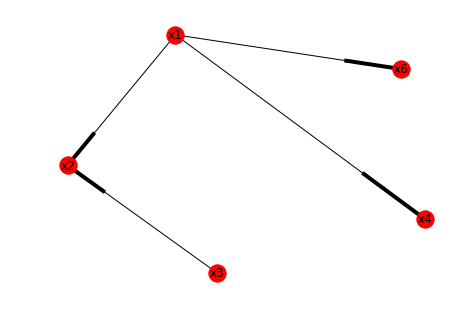

In [56]:
# Requires matplotlib < 2.2
import networkx as nx
import pylab as plt
nx.draw(nw1, with_labels=True)
plt.show()

In [57]:
from pgmpy.sampling import BayesianModelSampling
from pgmpy.estimators import K2Score
from pgmpy.inference import VariableElimination
import pandas as pd

In [30]:
inference = BayesianModelSampling(nw1)

In [31]:
data = inference.forward_sample(size=50, return_type='dataframe')

In [32]:
k2 = K2Score(data)

In [33]:
k2.score(nw1)

-271.4016340862217

In [58]:
#nw1.fit(data)
inference2 = VariableElimination(nw1)

In [60]:
inference2.map_query(['x1','x2','x3','x4','x6'])

{'x1': 0, 'x2': 1, 'x3': 1, 'x4': 0, 'x6': 1}

In [37]:
joint_dict = inference2.query(['x1','x2','x3','x4','x6'])

In [78]:
from pgmpy.factors.discrete import DiscreteFactor

In [88]:
temp1 = DiscreteFactor.product(phi1=joint_dict['x1'],self=joint_dict['x3'],inplace=False)
temp2 = DiscreteFactor.product(phi1=temp1,self=joint_dict['x2'],inplace=False)
temp3 = DiscreteFactor.product(phi1=temp2,self=joint_dict['x4'],inplace=False)
temp4 = DiscreteFactor.product(phi1=temp3,self=joint_dict['x6'],inplace=False)
print(temp4)

+------+------+------+------+------+-----------------------+
| x6   | x3   | x2   | x1   | x4   |   phi(x6,x3,x2,x1,x4) |
+======+======+======+======+======+=======================+
| x6_0 | x3_0 | x2_0 | x1_0 | x4_0 |                0.0015 |
+------+------+------+------+------+-----------------------+
| x6_0 | x3_0 | x2_0 | x1_0 | x4_1 |                0.0002 |
+------+------+------+------+------+-----------------------+
| x6_0 | x3_0 | x2_0 | x1_0 | x4_2 |                0.0004 |
+------+------+------+------+------+-----------------------+
| x6_0 | x3_0 | x2_0 | x1_1 | x4_0 |                0.0000 |
+------+------+------+------+------+-----------------------+
| x6_0 | x3_0 | x2_0 | x1_1 | x4_1 |                0.0000 |
+------+------+------+------+------+-----------------------+
| x6_0 | x3_0 | x2_0 | x1_1 | x4_2 |                0.0000 |
+------+------+------+------+------+-----------------------+
| x6_0 | x3_0 | x2_0 | x1_2 | x4_0 |                0.0003 |
+------+------+------+--

/home/pratik/anaconda3/envs/aml/lib/python3.7/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:586: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  phi.values = phi.values[slice_]
/home/pratik/anaconda3/envs/aml/lib/python3.7/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:598: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  phi1.values = phi1.values[slice_]


In [105]:
# Voila ! you can check if it sums to 1, it does !
np.argmax(temp4.values)

144

In [106]:
# Map kind of works there is a tie but joint prob finds the actuall assignment
temp4.assignment([144])

[[('x6', 1), ('x3', 1), ('x2', 0), ('x1', 0), ('x4', 0)]]

In [107]:
# Looks like it also finds true low prob th
temp4.assignment([np.argmin(temp4.values)])

[[('x6', 0), ('x3', 0), ('x2', 2), ('x1', 1), ('x4', 1)]]